In [1]:
#importing necessary libraraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
from datetime import datetime

In [2]:
#loading the data
googlePS=pd.read_csv("D:/data/googleplaystore.csv")

### Exploratory Data Analysis and Visualization

In [3]:
#viewing the data
googlePS.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
googlePS.info()
len(googlePS.App.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


9660

In [5]:
googlePS.isnull().sum()# checking for missing values in app data

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
googlePS.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
# for doing exploratary visualization dropping the missing values columns 
# to derive better relation to fill missing values
googlePS.dropna(how ='any', inplace = True)
len(googlePS.App.unique())

8190

In [8]:
googlePS.drop_duplicates(subset='App',keep = 'first', inplace = True) 
#dropping all duplicate values too

In [9]:
googlePS.describe()
#len(googlePS.App.unique())

,Rating
count,8190.000000
mean,4.173321
std,0.536691
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [10]:
googlePS['Last Updated']= pd.to_datetime(googlePS['Last Updated'])
googlePS.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [11]:
def distribution(df,feat):
    facet=sns.FacetGrid(df,height=6, aspect=8/6)
    facet.map(sns.distplot,feat,kde=False)
    facet.set(xlim=(0,df[feat].max()))
    facet.add_legend()
    plt.title('Distribution')
    plt.show()

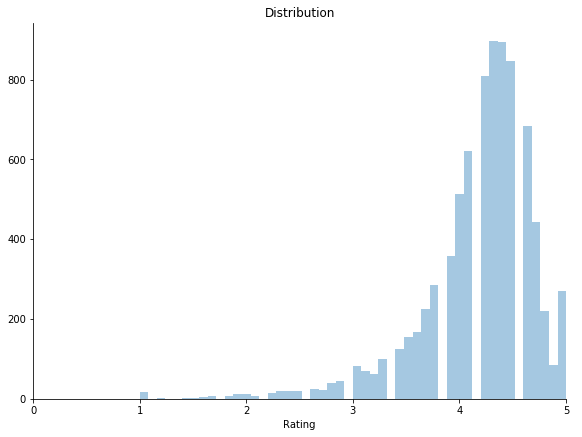

In [12]:
distribution(googlePS,'Rating')


### Note:
#### Most of the ratings are close to 4, most of its distribution lies in 3.8-4.8 only

## {Category}

In [13]:
googlePS.Category.unique()
#you an see that i am using "df.column"to access particular column which can only be done when column names does not contains spaces or keyword ascolun name

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Text(0.5, 1.0, 'Category Count')

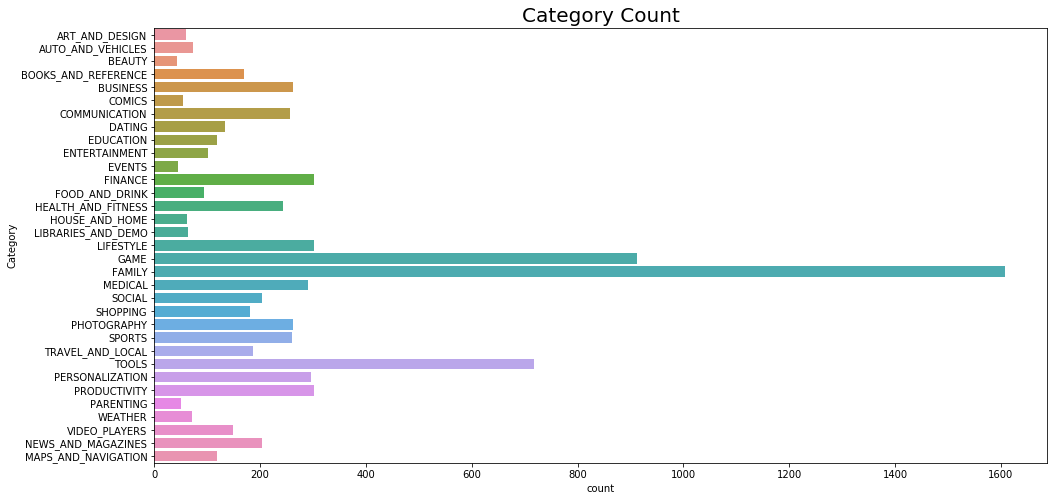

In [14]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(y="Category",data=googlePS,)
plt.title('Category Count',size = 20)

### Note:
#### Most of the apps on the list belong to family, tools and game.

Text(0.5, 1.0, 'Rating vs Category (Swarm)')

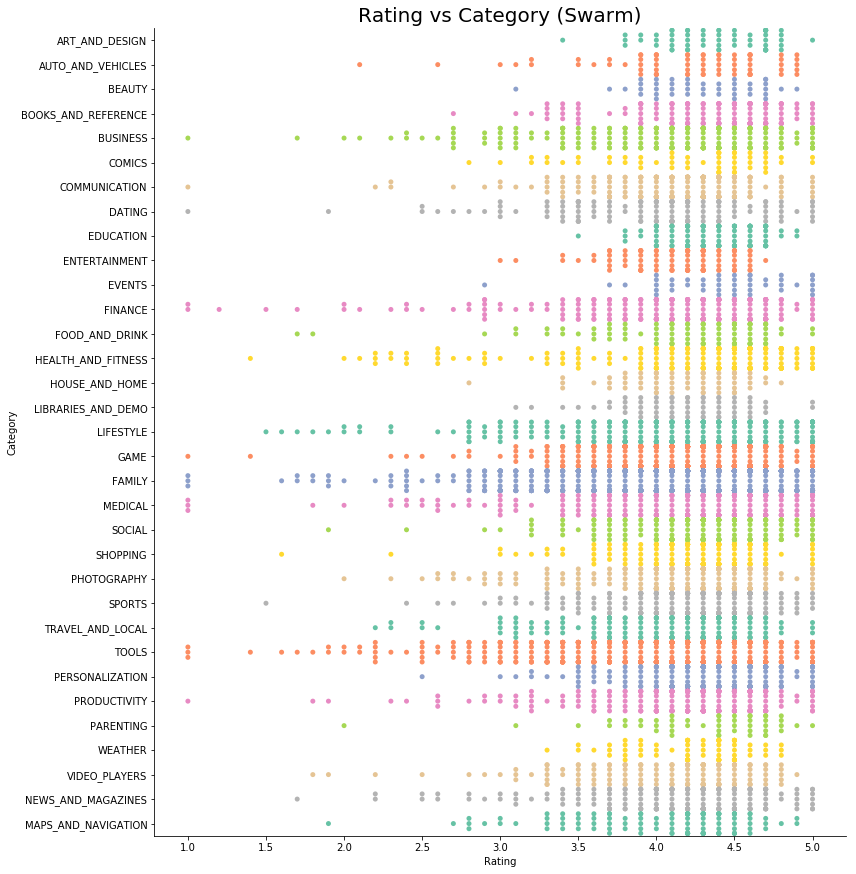

In [15]:
rate_category=sns.catplot(x="Rating",y="Category",data=googlePS, kind="swarm", height = 12,palette='Set2')
plt.title('Rating vs Category (Swarm)',size = 20)

### Note:
#### from the above plot we can see that most no. of apps with rating lower that 2.5 belong to Tools, Family, Lifestyle and Finance.
we can also say thay app having rating as 1 are fake apps.

Text(0.5, 1.0, 'Rating vs Category (Box)')

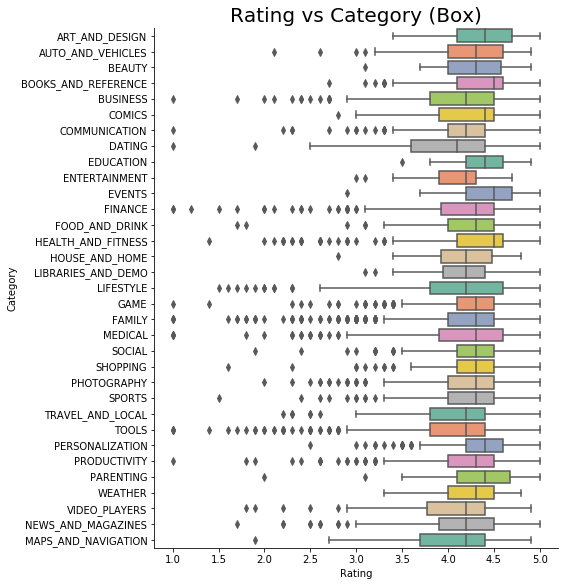

In [16]:
rate_cat=sns.catplot(x="Rating",y="Category",data=googlePS, kind="box", height = 8,palette='Set2')
plt.title('Rating vs Category (Box)',size = 20)

### Note:
#### only few categories like 'BOOKS_AND_REFERENCE', 'EVENTS' and 'HEALTH_AND_FITNESS' have their median greater than overall ratings median

## {Reviews}

In [17]:
#lets check review column now
googlePS.Reviews.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [18]:
#converting object data type to int
googlePS.Reviews = googlePS.Reviews.astype(int)
googlePS.Reviews.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int32

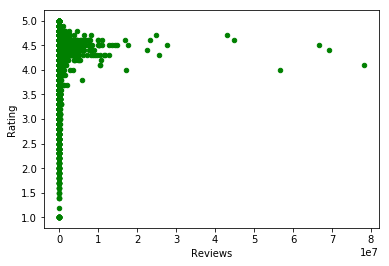

In [19]:
#Now ploting review with rating
googlePS.plot.scatter(x='Reviews', y='Rating',c='green')

### Note:
#### Most highly reviewd apps are mostly high rated.

In [20]:
# now lets check relatio between apps which have reviews less than 50000

Text(0.5, 1.0, 'Rating VS Reveiws')

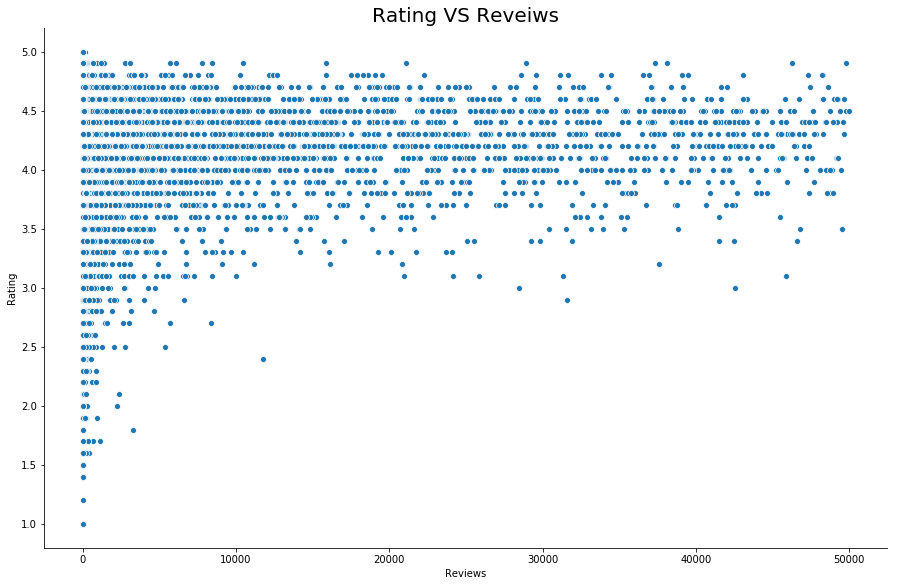

In [21]:
sns.relplot(x="Reviews", y="Rating",data=googlePS[googlePS['Reviews']<50000],aspect=11/7,height=8);
plt.title('Rating VS Reveiws',size = 20)

In [22]:
googlePS[googlePS.Reviews>2000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,2018-08-01,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,2018-08-02,Varies with device,Varies with device


### Note:
#### Famous the app more no. of reviews 

## {Size}

In [23]:
#now moving on to size column
googlePS.Size.head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [24]:
#It is also object type so first we need to convert it by replacing M and K
#lets check all the unique values in size first
googlePS.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [25]:
#checking the count of 'varies with device' tags in size column
len(googlePS[googlePS.Size == 'Varies with device'])

1169

In [26]:
#replacing them with NAN values first then we will impute
googlePS['Size'].replace('Varies with device', np.nan, inplace = True )

In [27]:
googlePS.Size = (googlePS.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
            googlePS.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [28]:
googlePS.Size.head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64

In [29]:
googlePS.Size.fillna(googlePS.groupby('Category')['Size'].transform('mean'),inplace = True)

In [30]:
googlePS.Size.describe()

count    8.190000e+03
mean     2.136320e+07
std      2.133080e+07
min      8.500000e+00
25%      5.800000e+06
50%      1.415746e+07
75%      2.897678e+07
max      1.000000e+08
Name: Size, dtype: float64

In [31]:
#now we will divide the size column by 1000 to get all the size values in kb only
googlePS.Size=googlePS.Size.div(1000)

In [32]:
googlePS.Size.describe()

count      8190.000000
mean      21363.200759
std       21330.799135
min           0.008500
25%        5800.000000
50%       14157.456170
75%       28976.778163
max      100000.000000
Name: Size, dtype: float64

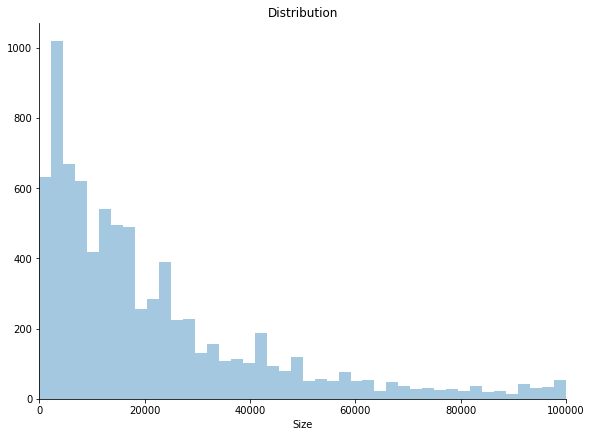

In [33]:
distribution(googlePS,'Size')


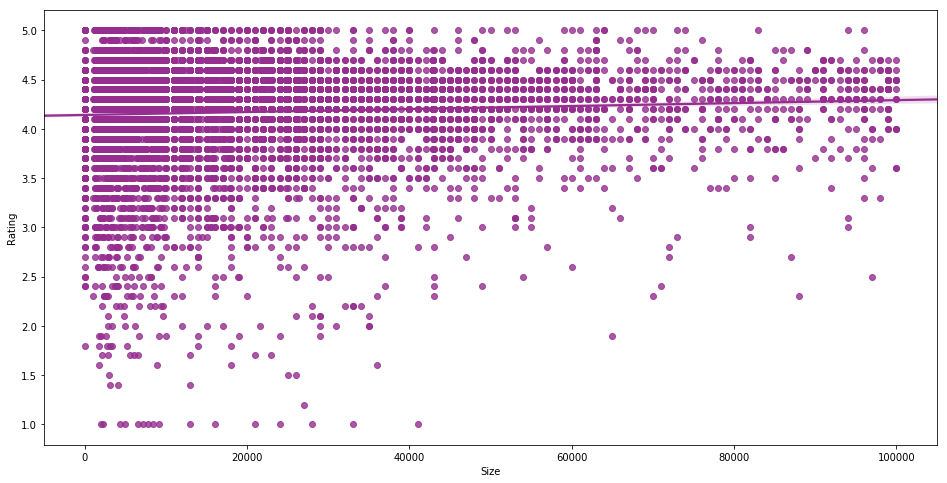

In [34]:
plt.figure(figsize=(16, 8))
sns.regplot(x="Size", y="Rating",data=googlePS,color="#952e8f")

### Note:
#### Apps with bigger size have good rating in general
##### We can also say that the apps size is justified for bigger apps as they are for a purpose.

## {Last Updated}

Text(0.5, 1.0, 'Rating vs Last Updated')

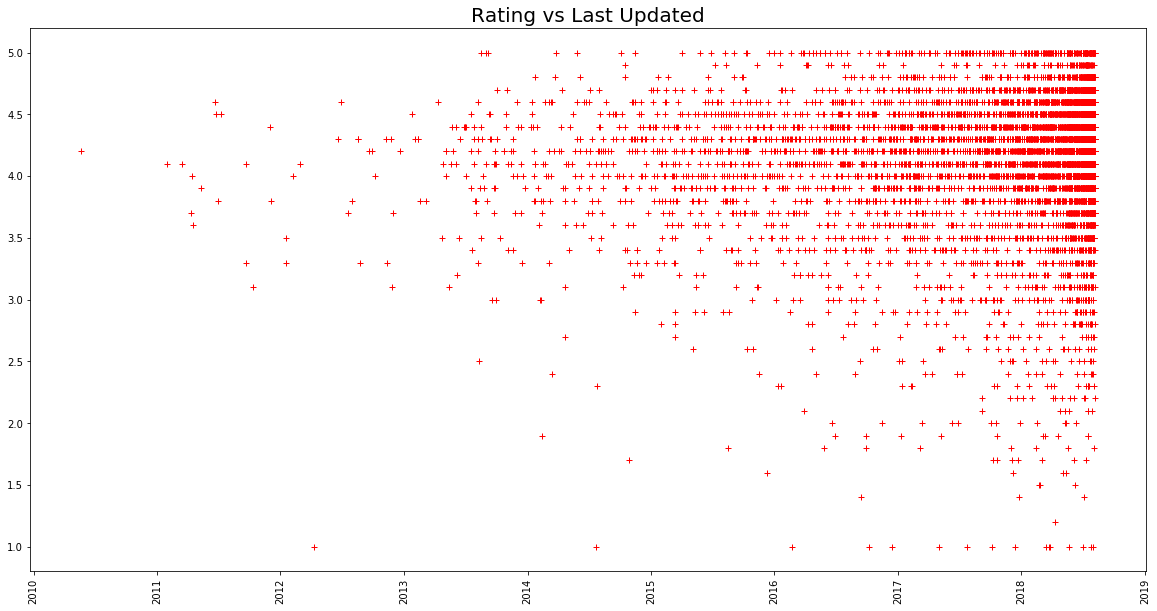

In [35]:
#Now i am going to plot last updated date of apps with respect to their rating 
#because i think there is a very important relation between them, lets see.
plt.figure(figsize=(20, 10))
plt.plot(googlePS['Last Updated'], googlePS['Rating'], 'r+')
plt.xticks(rotation='vertical')
plt.title('Rating vs Last Updated',size = 20)

### Note:
##### As expected you can see that highest density of highly rated apps lie in the recent time period
##### this suggest that these apps are regulary updated and have better support
##### There is one more important insight that in the recent years Number of low rated Apps have incresed too
This can be due to increase in number of android device users 

## {Installs}

In [36]:
#now lets first convert installs, price to numerical data first
googlePS.Installs = googlePS.Installs.apply(lambda x: x.replace(',',''))
googlePS.Installs = googlePS.Installs.apply(lambda x: x.replace('+',''))
googlePS.Installs = googlePS.Installs.apply(lambda x: int(x))

In [37]:
googlePS.Price = googlePS.Price.apply(lambda x: x.replace('$',''))
googlePS.Price = googlePS.Price.apply(lambda x: float(x))
googlePS.describe()

,Rating,Reviews,Size,Installs,Price
count,8190.000000,8.190000e+03,8190.000000,8.190000e+03,8190.000000
mean,4.173321,2.554354e+05,21363.200759,9.171613e+06,1.038342
std,0.536691,1.986309e+06,21330.799135,5.827170e+07,16.864040
min,1.000000,1.000000e+00,0.008500,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,5800.000000,1.000000e+04,0.000000
50%,4.300000,3.009500e+03,14157.456170,1.000000e+05,0.000000
75%,4.500000,4.391425e+04,28976.778163,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


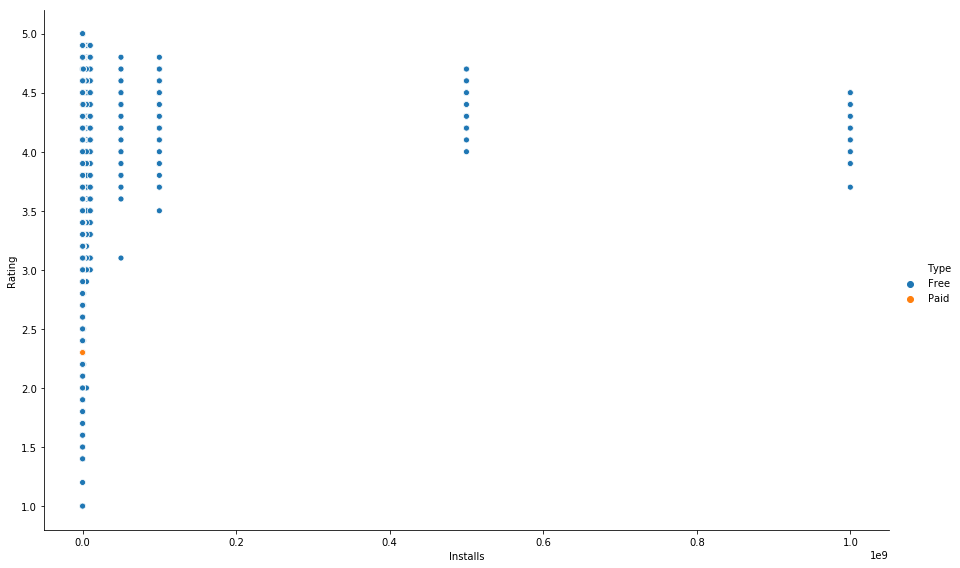

In [38]:
sns.relplot(x="Installs", y="Rating",hue='Type',data=googlePS,aspect=11/7,height=8)

### Note:
##### We will have to impute installs into regular bins to get a clear idea

In [39]:
Sorted_value = sorted(list(googlePS['Installs'].unique()))
googlePS['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )

Text(0.5, 1.0, 'Rating vs Installs')

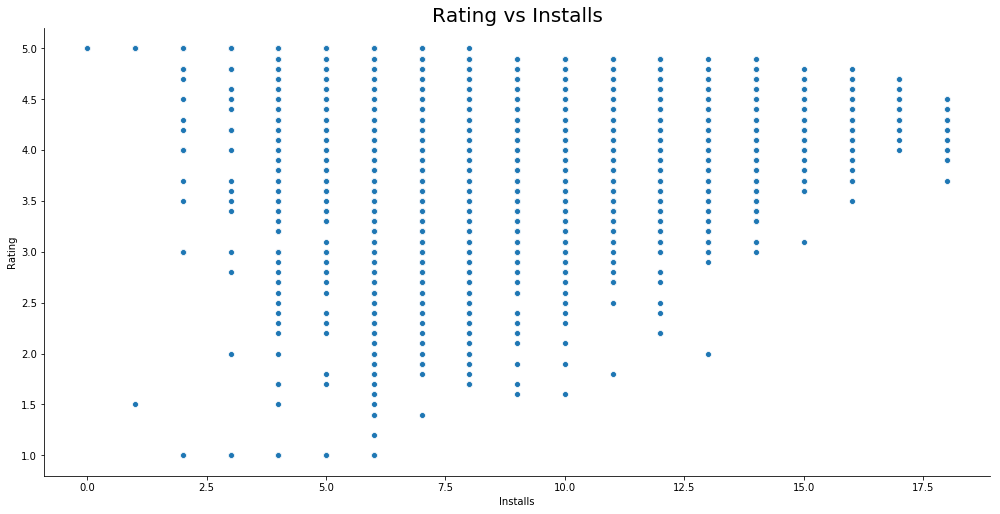

In [40]:
sns.relplot(x="Installs", y="Rating",data=googlePS,aspect=12/6,height=7)
plt.title('Rating vs Installs',size = 20)

In [41]:
googlePS[googlePS.Installs>17]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,14157.456170,18,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,11897.926191,18,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,11897.926191,18,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,11897.926191,18,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,11897.926191,18,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,11897.926191,18,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,11897.926191,18,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,23043.750000,18,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76000.000000,18,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
2544,Facebook,SOCIAL,4.1,78158306,17307.698154,18,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device


Text(0.5, 1.0, 'Rating, Installs and Category')

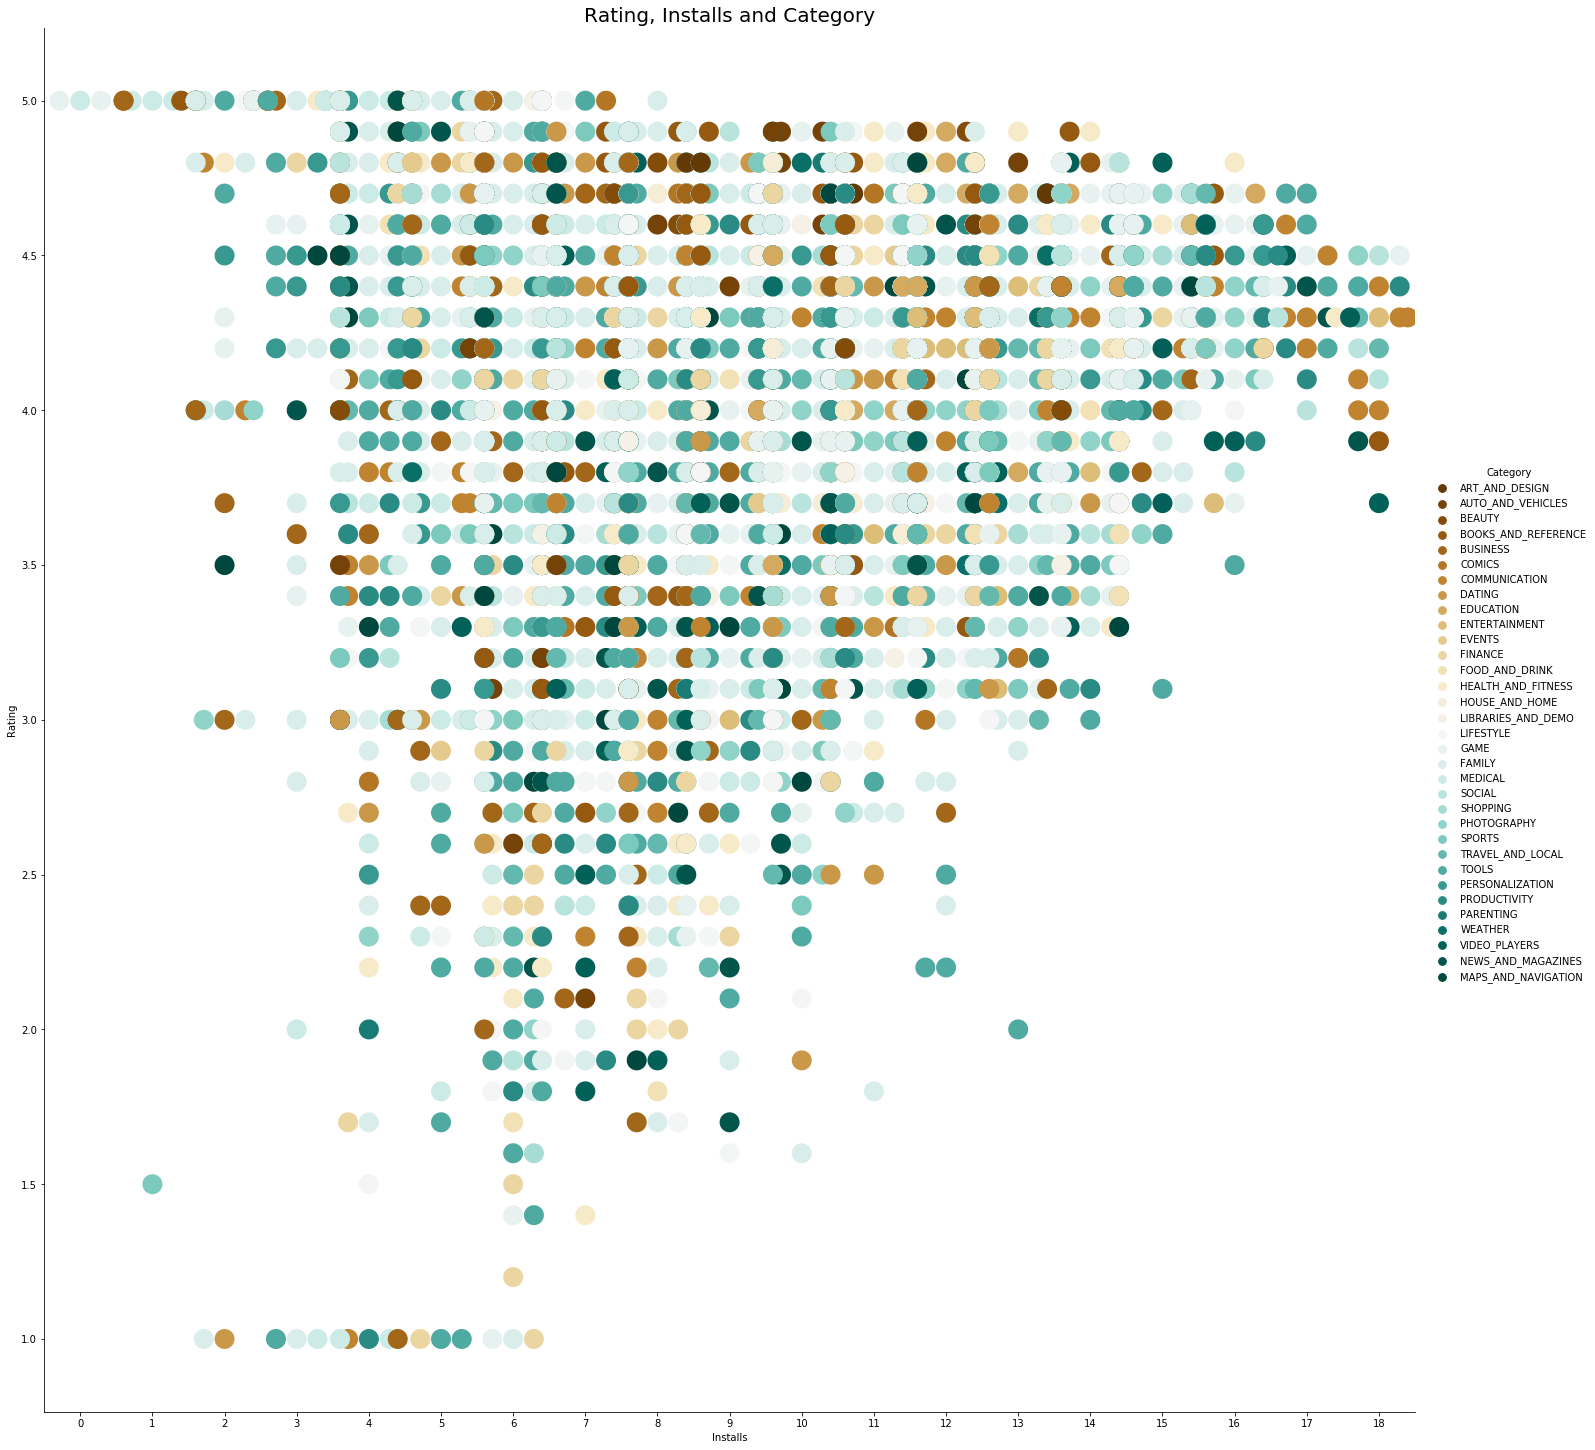

In [63]:
sns.catplot(y="Rating",x="Installs",hue="Category",data=googlePS, kind="swarm", height = 20,palette='BrBG',s=20)
plt.title('Rating, Installs and Category',size = 20)

### Note:
##### Only apps with 4+ rating can make it to the 10M+ installs category. 
##### Most installed apps i.e 1B+ installs belong to Communication category.
##### only few apps have a perfect 5 rating provided they have few installs too, so we cant say that they are particularly good apps

## {Type}

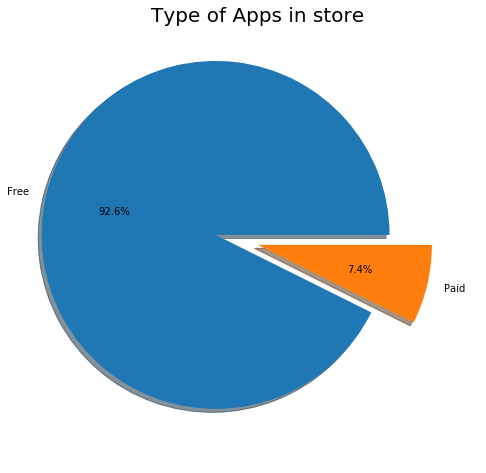

In [43]:
plt.figure(figsize=(16, 8))
plt.pie(googlePS.Type.value_counts(sort=True), explode=(0.25,0), labels=googlePS.Type.value_counts(sort=True).index,
        autopct='%1.1f%%', shadow=True,)

plt.title('Type of Apps in store',size = 20)
plt.show()

### Note:
##### Only 7.4 percent of the apps are paid on playstore

Text(0.5, 1.0, 'Type count')

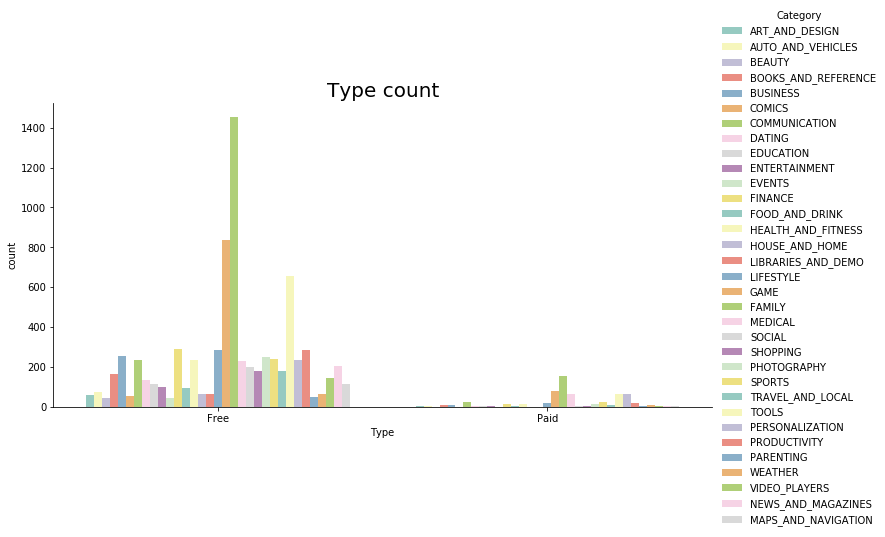

In [44]:
#now lets check the categories with type
sns.catplot(x="Type",hue="Category",data=googlePS, kind="count", aspect=12/6,palette='Set3')
plt.title('Type count',size = 20)

### Note:
##### In paid type also highest no. of apps belong to game & Family only

Text(0.5, 1.0, 'Rating vs Type')

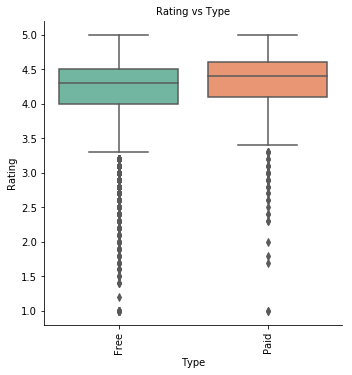

In [45]:
#type with rating
s=sns.catplot(y="Rating",x="Type",data=googlePS, kind="box", height = 5,palette='Set2')
s.set_xticklabels(rotation=90)
plt.title('Rating vs Type',size = 10)

In genral paid apps have better overall rating, but this result may be baised as there are very less no. of paid instances present.

In [46]:
price=sorted(list(googlePS['Price'].unique()))

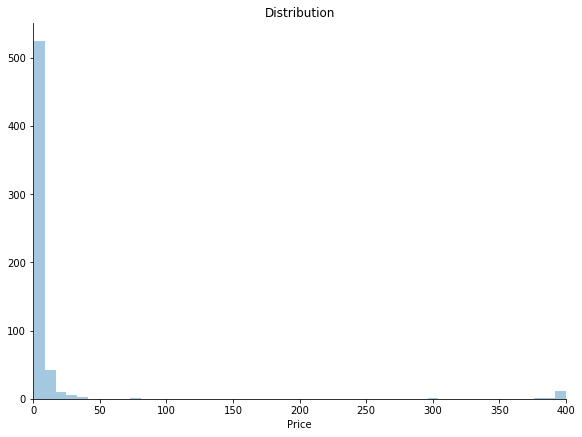

In [47]:
distribution(googlePS[googlePS.Price>0],'Price')#price distibution for only paid apps

Text(0.5, 1.0, 'Rating vs price')

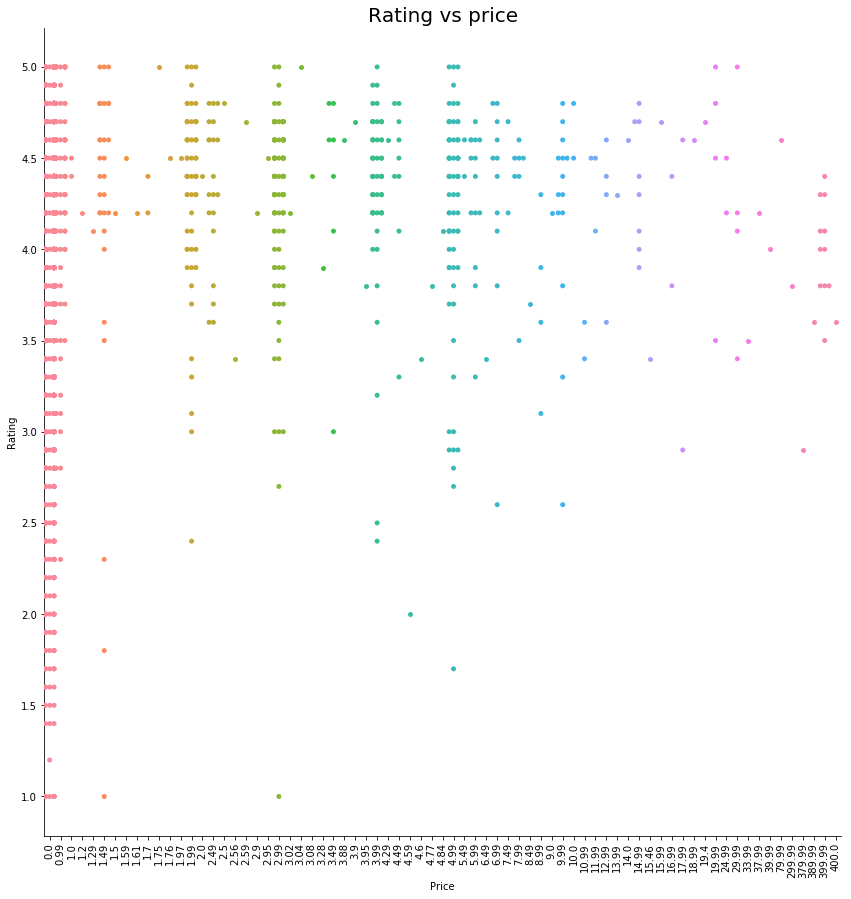

In [48]:
c=sns.catplot(y="Rating",x="Price",data=googlePS, height=12, kind='swarm')
c.set_xticklabels(rotation=90)
plt.title('Rating vs price',size = 20)

In [49]:
#checking the apps having prices above $79.99
googlePS[googlePS.Price>79.99]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.000,4,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.000,8,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.000,8,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.000,10,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.000,8,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.000,8,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.000,9,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.000,6,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.000,6,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,0.965,7,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up


### Note:
#### All the above apps does not provide any untilty other than to boast their Richness.

Text(0.5, 1.0, 'Rating vs Content Rating')

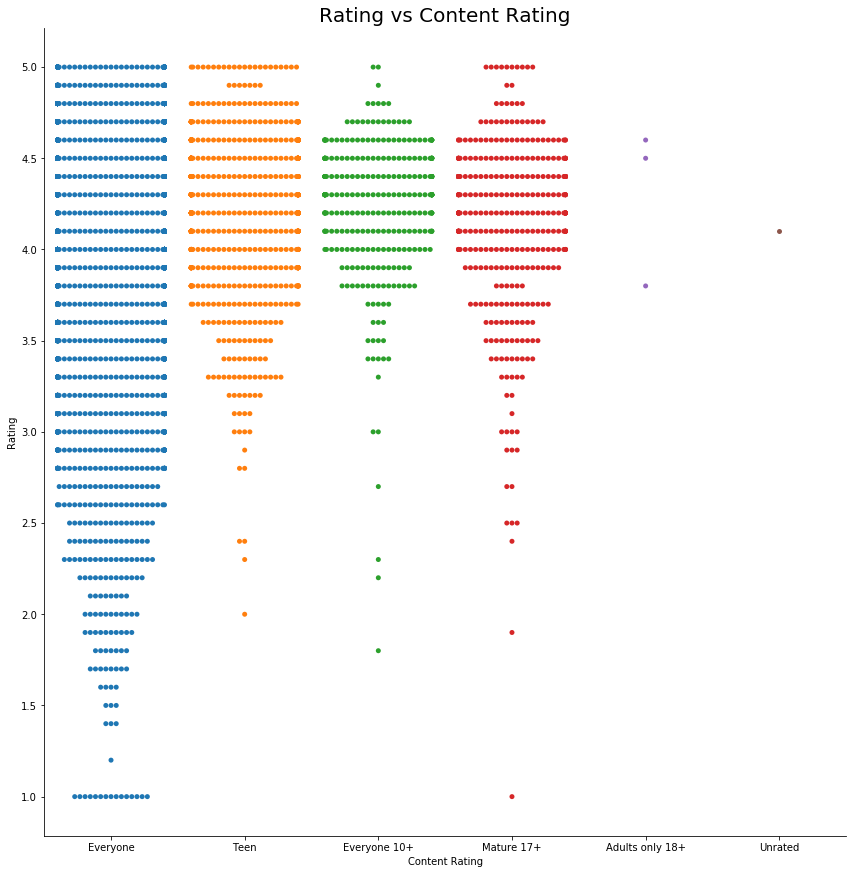

In [50]:
d=sns.catplot(y="Rating",x="Content Rating",data=googlePS, height=12,kind="swarm")
plt.title('Rating vs Content Rating',size = 20)

### Note:
##### Most of low rated apps have content rating as "Everyone"

In [51]:
#moving on to genres column
googlePS.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [52]:
len(googlePS.Genres.unique())

114

In [53]:
# there are a lot of genres of subcategories so we are going to remove the sub categories and analyse the data again
googlePS.Genres = googlePS.Genres.str.split(';').str[0]
googlePS.Genres.unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [54]:
googlePS.Genres.replace('Music & Audio', 'Music',inplace = True)

In [55]:
len(googlePS.Genres.unique())#size is significantly reduced

47

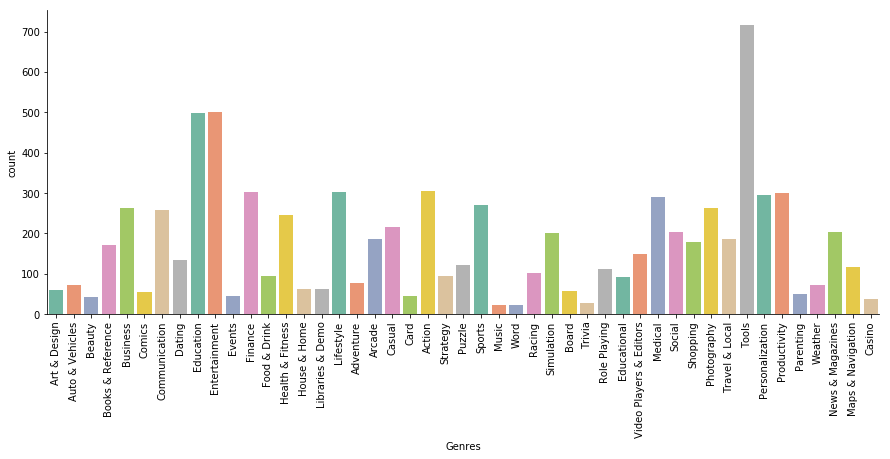

In [56]:
a=sns.catplot(x="Genres",data=googlePS, kind="count", aspect=100/40,palette='Set2')
a.set_xticklabels(rotation=90)

### Note:
#### From this genres count plot we can see that most off the apps belong to tools genres as the Game and family categories are distributed among various genres.

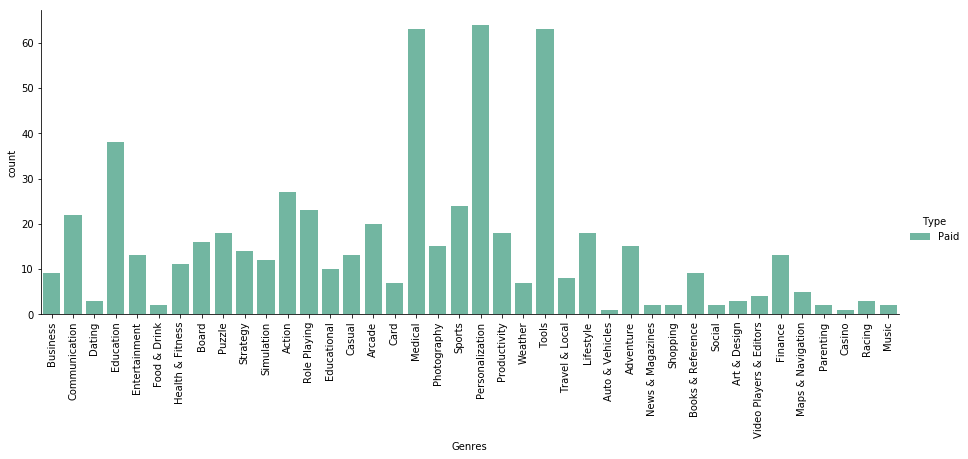

In [57]:
b=sns.catplot(x="Genres",data=googlePS[googlePS.Price>0], kind="count",hue='Type', aspect=100/40,palette='Set2')
b.set_xticklabels(rotation=90)

### Note:
##### Most of the paid apps belong to the medical, tools and personalization.

### Now lets consider various columns on the basic of no. installs

#### Lets remember the bins for No. of install
##### 1+                       = 0 
##### 5+                       = 1
##### 10+                      = 2
##### 50+                      = 3
##### 100+                     = 4
##### 500+                     = 5
##### 1000+                    = 6
##### 5000+                    = 7
##### 10000+                   = 8
##### 50000+                   = 9
##### 100000+                  = 10
##### 500000+                  = 11
##### 1000000+                 = 12
##### 5000000+                 = 13
##### 10000000+                = 14
##### 50000000+                = 15
##### 100000000+               = 16
##### 500000000+               = 17
##### 1000000000+              = 18

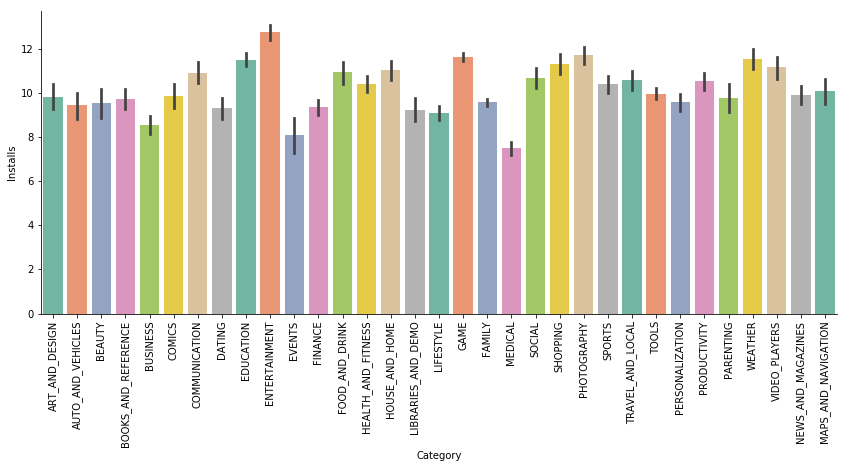

In [58]:
#comparing Installs with Category
e=sns.catplot(y="Installs",data=googlePS, aspect=100/40,palette='Set2', x="Category", kind='bar')
e.set_xticklabels(rotation=90)

### Note:
#### Clearly from here we can see that "Entertainments" app are among the most installed apps from play store.

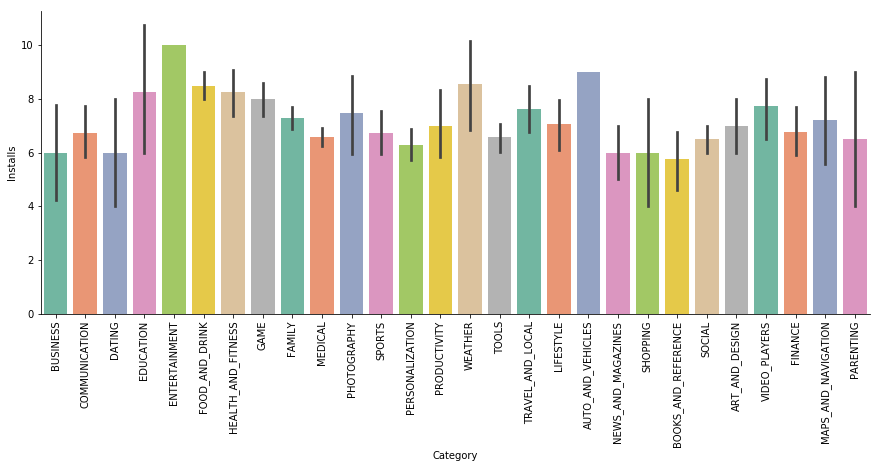

In [59]:
f=sns.catplot(y="Installs",data=googlePS[googlePS.Price>0], aspect=100/40,palette='Set2', x="Category", kind='bar')
f.set_xticklabels(rotation=90)

In [60]:
df_temp = googlePS[(googlePS.Installs >= 12)
           & (googlePS.Rating >= 4)
           & (googlePS.Reviews >=10000)][['App','Category','Rating','Size','Type','Installs']].sort_values('Installs', ascending=0)

In [61]:
#top free apps
top_free = df_temp[(df_temp.Type == 'Free')][['App']].head(10)
top_free

,App
3117,Maps - Navigate & Explore
1654,Subway Surfers
2808,Google Photos
340,Gmail
338,Google Chrome: Fast & Secure
865,Google Play Games
2554,Google+
336,WhatsApp Messenger
335,Messenger – Text and Video Chat for Free
3665,YouTube


In [62]:
#top paid apps
top_paid = df_temp[(df_temp.Type == 'Paid')][['App']].head(10)
top_paid

,App
4034,Hitman Sniper
2241,Minecraft
7355,Threema
7417,Grand Theft Auto: San Andreas
9941,Tasker
9678,Where's My Water?
10682,Fruit Ninja Classic
2242,Card Wars - Adventure Time
9151,Lost Journey (Dreamsky)
9165,League of Stickman 2018- Ninja Arena PVP(Dream...


## Conlusions:
     1. Average rating of the Apps is quite high around 4.2
     2. Apps having lower rating are relatively newer.
     3. Most apps are from game and Family category, which are finally divided into sub genres.
     4. But the most no. of installs are for Entertainment apps
     5. Most installed apps i.e 1B+ installs belong to Communication category.